In [2]:
#importing and installing req libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import files

print("Setting up the environment...")

Setting up the environment...


In [3]:
#now we need to setup the kaggle api key and then downlaod and extract the dataset
try:
    kaggle_dir = '/root/.kaggle'
    kaggle_json_path = os.path.join(kaggle_dir, 'kaggle.json')

    if not os.path.exists(kaggle_json_path):
        print("Please upload your 'kaggle.json' file.")
        uploaded = files.upload()

        if 'kaggle.json' not in uploaded:
            raise ValueError("The file 'kaggle.json' was not uploaded.")

        if not os.path.exists(kaggle_dir):
            os.makedirs(kaggle_dir)

        with open(kaggle_json_path, 'wb') as f:
            f.write(uploaded['kaggle.json'])

        print(f"'kaggle.json' has been moved to {kaggle_json_path}")

    os.chmod(kaggle_json_path, 600)
    print("Kaggle API configured successfully.")

except Exception as e:
    print(f"An error occurred during Kaggle setup: {e}")


print("Downloading the Brain Tumor MRI dataset...")
os.system('kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset')

zip_path = 'brain-tumor-mri-dataset.zip'
if os.path.exists(zip_path):
    print("Unzipping dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Dataset unzipped.")
else:
    print(f"Error: {zip_path} not found.")

Please upload your 'kaggle.json' file.


Saving kaggle.json to kaggle.json
'kaggle.json' has been moved to /root/.kaggle/kaggle.json
Kaggle API configured successfully.
Unzipping dataset...
Dataset unzipped.


Preparing image data generators...
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data generators are ready.
Below is the images from the training dataset


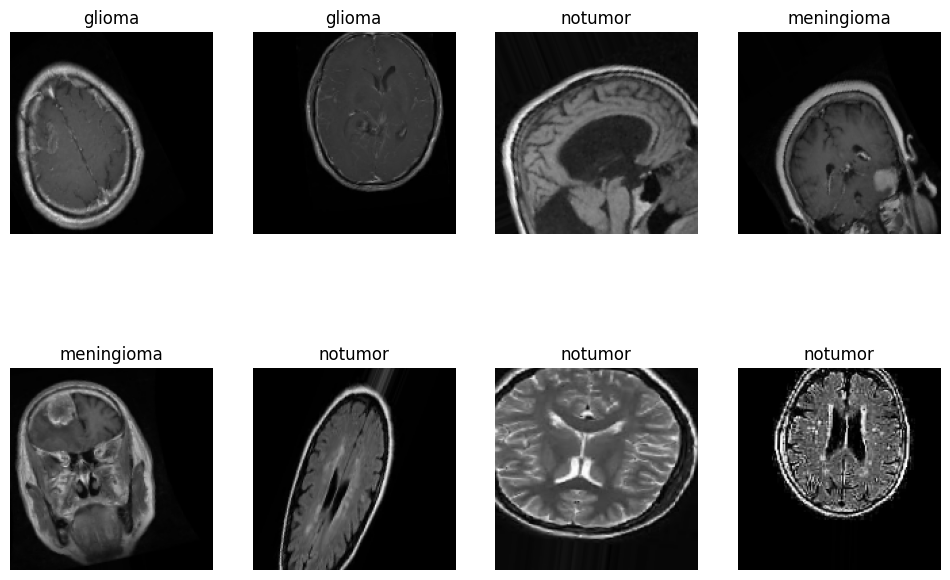

In [4]:
#defining the path & setting up the image data generator to laood and prepare the images for training
base_dir = 'dataset'
training_dir = os.path.join(base_dir, 'Training')
testing_dir = os.path.join(base_dir, 'Testing')

# Set image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

print("Preparing image data generators...")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical' # For multi-class data
)

validation_generator = validation_datagen.flow_from_directory(
    testing_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical' # For multi-class data
)

print("Data generators are ready.")


#displaying the dataset images
print("Below is the images from the training dataset")
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(12, 8))

for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    class_index = labels[i].argmax()
    plt.title(class_names[class_index])
    plt.axis("off")

plt.show()

In [5]:
#CNN architecture in layers
print("Building the CNN model...")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dropout(0.5),
    Dense(512, activation='relu'),

    Dense(4, activation='softmax') # 4 classes, so 4 neurons and softmax
])

model.summary()

Building the CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Model Compilation and Training
print("Compiling the model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Starting model training...")
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose=1
)
print("Model training completed.")

Compiling the model...
Starting model training...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.5007 - loss: 1.0879 - val_accuracy: 0.6217 - val_loss: 0.9768
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.6543 - loss: 0.8340 - val_accuracy: 0.7079 - val_loss: 0.7439
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.7297 - loss: 0.7127 - val_accuracy: 0.5858 - val_loss: 1.2374
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.7264 - loss: 0.6708 - val_accuracy: 0.6140 - val_loss: 1.0100
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.7644 - loss: 0.6028 - val_accuracy: 0.5744 - val_loss: 1.0476
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.7588 - loss: 0.5996 - val_accuracy: 0.7109 - val_loss: 0.7462
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.7581 - loss: 0.5862 - val_accuracy: 0.6514 - val_loss: 0.9158
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.7876 - loss: 0.5330 - val_accu

Visualizing training results...


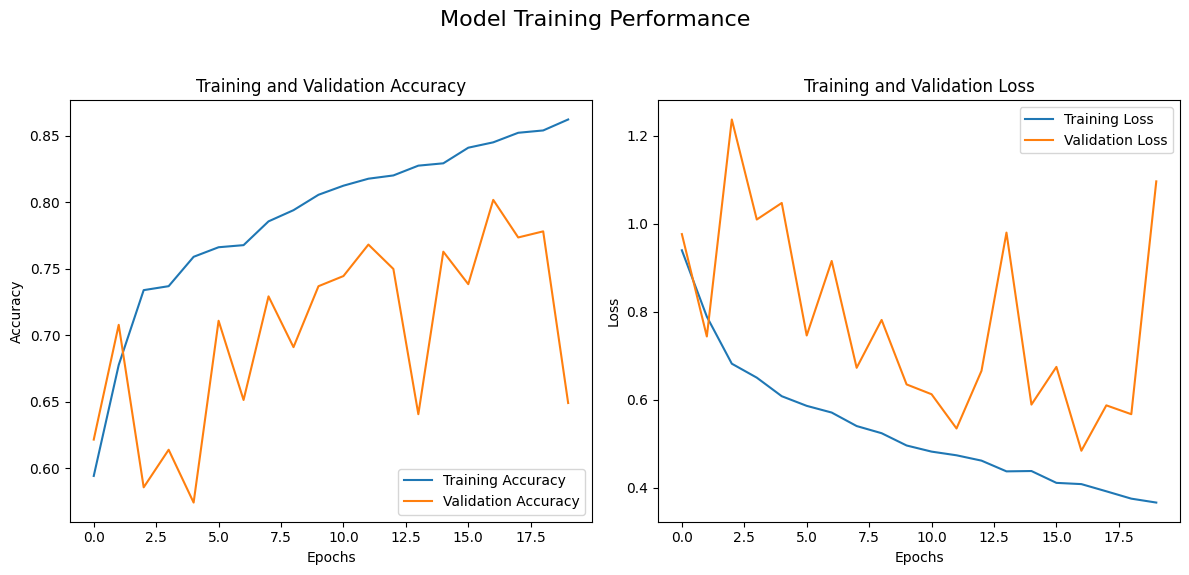

Script finished.


In [7]:
#visualising the results the final step
print("Visualizing training results...")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Script finished.")